<a href="https://colab.research.google.com/github/mrmarthy/DataScienceSS20/blob/mrmarthy-solution/Exercises/7_a_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable 

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [75]:
(XTrain, YTrain),(XTest, XTest) = keras.datasets.mnist.load_data()

In [76]:
input = keras.Input(shape=(784,))
layer2 = layers.Dense(128, activation="relu")(input)
layer3 = layers.Dense(128, activation="relu")(layer2)
layer4 = layers.Dense(128, activation="relu")(layer3)
layer5 = layers.Dense(128, activation="relu")(layer4)
ouput = layers.Dense(784, activation="sigmoid")(layer5)

In [77]:
model = keras.Model(input, ouput)
##model.summary()

In [78]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

In [80]:
#preprocessing
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#training
history = model.fit(x_train, x_train, batch_size=32, epochs=10, )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0121
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0050
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0039
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0033
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0029
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0026
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0025
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0023
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0022
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0021


In [81]:
pred = model.predict(x_train)

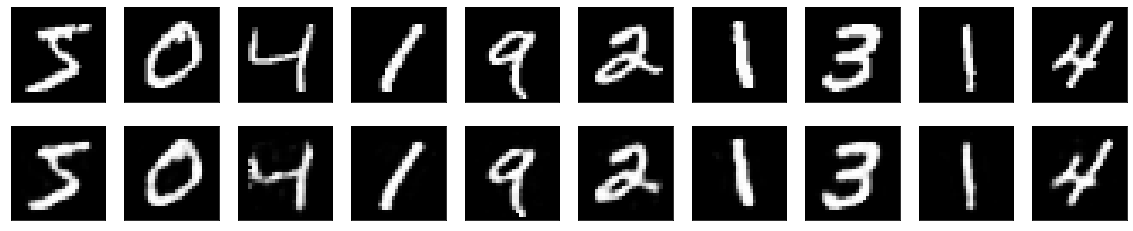

In [82]:
#to check from solution
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()